In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Player:
    def __init__(self, x, y, color, idy):
        self.id = idy
        self.x = x
        self.y = y
        self.color = color
        self.walls = []

    def move_left(self):
        posx = self.x-1
        posy = self.y
        
        for p in players:
            for i in range(len(p.walls)):
                if p.walls[i].x == posx and p.walls[i].y == posy:
                    print("Can't move left, there's a big wall")
                    return
                
        print("Player: ", self.id, "moved left")
        self.x = self.x - 2
                    
    def move_right(self):
        posx = self.x+1
        posy = self.y
        
        for p in players:
            for i in range(len(p.walls)):
                if p.walls[i].x == posx and p.walls[i].y == posy:
                    print("Can't move right, there's a big wall")
                    return
                
        print("Player: ", self.id, "moved right")
        self.x = self.x + 2

    def move_up(self):
        posx = self.x
        posy = self.y-1
        
        for p in players:
            for i in range(len(p.walls)):
                if p.walls[i].x == posx and p.walls[i].y == posy:
                    print("Can't move up, there's a big wall")
                    return
        
        print("Player: ", self.id, "moved up")
        self.y = self.y - 2

    def move_down(self):
        posx = self.x
        posy = self.y+1
        
        for p in players:
            for i in range(len(p.walls)):
                if p.walls[i].x == posx and p.walls[i].y == posy:
                    print("Can't move down, there's a big wall")
                    return
        
        print("Player: ", self.id, "moved down")
        self.y = self.y + 2
    
    def add_wall(self, wall):
        self.walls.append(wall)

    def place_wall(self, x, y):
        n = len(self.walls)
        if x % 2 == 0 and y % 2 == 0: #only in odd can place a wall
            print("Can't place a wall")
            return
        cont = 0
        for i in range(n):
            if (self.walls[i].used == False):
                self.walls[i].used = True
                self.walls[i].x = x
                self.walls[i].y = y
                print("Player", self.id, "has:", n - (cont + 1), "walls left")
                break
            else:
                cont+=1

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


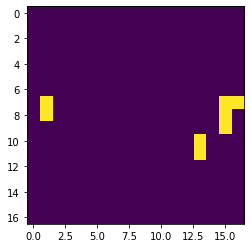

In [3]:
matris = """
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
01000000000000011
01000000000000010
00000000000000010
00000000000001000
00000000000001000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
"""
m = [[int(c) for c in line] for line in matris.strip().split('\n')]
print(np.array(m))
plt.imshow(m)

In [4]:
def backtracking_test(matrix, endrow, endcol, y, x): #MATRIZ Y PLAYER DE ATRIBUTO Y QUE RECORRA TODA LA MATRIZ PARA SABER QUE CAMINO TOMARIA 
    nrows = len(m)
    ncols = len(m[0])
    
    if y < 0 or y >= nrows or x < 0 or x >= ncols or matrix[y][x] != 0: return False 
    
    m[y][x] = 2 #camino visitado 
    
    if endcol == x:
        return True
        
    if(matrix[y][x - 1] == 0):
        if backtracking_test(matrix, endrow, endcol, y, x - 2): return True
    if(matrix[y + 1][x] == 0):
        if backtracking_test(matrix, endrow, endcol, y + 2, x): return True
    if(matrix[y - 1][x] == 0):
        if backtracking_test(matrix, endrow, endcol, y - 2, x): return True
    if(matrix[y][x + 1] == 0):
        if backtracking_test(matrix, endrow, endcol, y, x + 2): return True  

    return False

In [5]:
backtracking_test(m, 8,0, 8, 16)

True

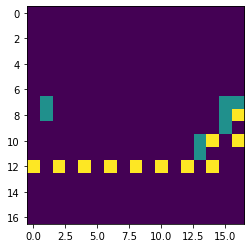

In [6]:
plt.imshow(m)

In [7]:
def backtracking(m, player):
    path = [] #almacenar los pasos que va avanzando
    if player.id == 1:
        endcol = 16
        endrow = -1

    if player.id == 2:
        endcol = 0
        endrow = -1

    if player.id == 3:
        endcol = -1
        endrow = 16

    if player.id == 4:
        endcol = -1
        endrow = 0

    def backtracking_test(matrix, endrow, endcol, y, x):  
        nrows = len(m)
        ncols = len(m[0])
        
        if y < 0 or y >= nrows or x < 0 or x >= ncols or matrix[y][x] != 0: return False 
        
        m[y][x] = 2 #camino visitado 
        if player.id == 1:
            
            if endcol == x: return True
            if(matrix[y][x + 1] == 0):
                if backtracking_test(matrix, endrow, endcol, y, x + 2): return True
            if(matrix[y + 1][x] == 0):
                if backtracking_test(matrix, endrow, endcol, y + 2, x): return True
            if(matrix[y - 1][x] == 0):
                if backtracking_test(matrix, endrow, endcol, y - 2, x): return True
            if(matrix[y][x - 1] == 0):
                if backtracking_test(matrix, endrow, endcol, y, x - 2): return True

        if player.id == 2:
            
            if endcol == x: return True
            if(matrix[y][x - 1] == 0):
                if backtracking_test(matrix, endrow, endcol, y, x - 2): return True
            if(matrix[y + 1][x] == 0):
                if backtracking_test(matrix, endrow, endcol, y + 2, x): return True
            if(matrix[y - 1][x] == 0):
                if backtracking_test(matrix, endrow, endcol, y - 2, x): return True
            if(matrix[y][x + 1] == 0):
                if backtracking_test(matrix, endrow, endcol, y, x + 2): return True

        if player.id == 3:

            if endrow == y: return True
            if(matrix[y + 1][x] == 0):
                if backtracking_test(matrix, endrow, endcol, y + 2, x): return True
            if(matrix[y][x + 1] == 0):
                if backtracking_test(matrix, endrow, endcol, y, x + 2): return True
            if(matrix[y][x - 1] == 0):
                if backtracking_test(matrix, endrow, endcol, y, x - 2): return True
            if(matrix[y - 1][x] == 0):
                if backtracking_test(matrix, endrow, endcol, y - 2, x): return True
            
        if player.id == 4:

            if endrow == y: return True
            if(matrix[y - 1][x] == 0):
                if backtracking_test(matrix, endrow, endcol, y - 2, x): return True
            if(matrix[y][x + 1] == 0):
                if backtracking_test(matrix, endrow, endcol, y, x + 2): return True
            if(matrix[y][x - 1] == 0):
                if backtracking_test(matrix, endrow, endcol, y, x - 2): return True
            if(matrix[y + 1][x] == 0):
                if backtracking_test(matrix, endrow, endcol, y + 2, x): return True
            
        return False
    
    backtracking_test(m, endrow, endcol, player.y, player.x)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


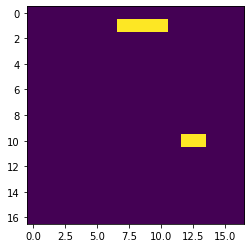

In [18]:

mx = """
00000000000000000
00000001111000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000011000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
00000000000000000
"""
ma = [[int(c) for c in line] for line in mx.strip().split('\n')]
print(np.array(ma))
plt.imshow(ma)

pl = Player(8,0, 'gold', 3)

backtracking(ma, pl)

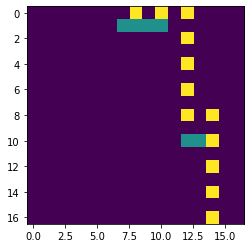

In [19]:
plt.imshow(ma)
#initState = [[0, 8, 'royalblue'], [16,8,'limegreen'], 
                 #[8, 0, 'gold'],     [8, 16, 'deeppink']]
        

In [20]:
def place_wall_backtracking(m,y,x):
    m[y][x] = 1

In [27]:
m = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [28]:
print(len(m))

17


In [29]:
print(len(m[0]))

17


In [31]:
print(m)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [32]:
place_wall_backtracking(m, 0, 0)

In [33]:
print(m)

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
